In [124]:
import pandas as pd
from pathlib import Path
import hvplot.pandas
import numpy as np
from sklearn import preprocessing
import datetime
import matplotlib.pyplot as plt

In [125]:
fb_csv = Path("../Resources/fb_data.csv")
fb_df = pd.read_csv(fb_csv)
fb_df['Date'] = pd.to_datetime(fb_df.Date).dt.date

In [126]:
fb_df.head()

,Date,Open,High,Low,Close,Volume,Volatility,sentiment,RSI
0,2019-01-02,128.99,137.51,128.56,135.4100,25465924,0.286522,-0.025997,NaN
1,2019-01-03,134.69,137.17,131.12,131.8902,18011900,0.088181,-0.057317,NaN
2,2019-01-04,134.01,138.00,133.75,137.9400,23927539,0.164677,0.083206,NaN
3,2019-01-07,137.45,138.87,135.91,138.2300,16261533,0.021965,-0.016295,NaN
4,2019-01-08,139.89,143.14,139.54,142.5843,22239823,0.104831,0.039262,NaN


In [127]:
df = fb_df.drop(columns=['Open', 'High', 'Low'])
df.head()

,Date,Close,Volume,Volatility,sentiment,RSI
0,2019-01-02,135.4100,25465924,0.286522,-0.025997,NaN
1,2019-01-03,131.8902,18011900,0.088181,-0.057317,NaN
2,2019-01-04,137.9400,23927539,0.164677,0.083206,NaN
3,2019-01-07,138.2300,16261533,0.021965,-0.016295,NaN
4,2019-01-08,142.5843,22239823,0.104831,0.039262,NaN


In [128]:
#df["Feature"] = df.Close.shift(1)
df.dropna(inplace=True)
df.set_index("Date", inplace = True)
df.head()

,Close,Volume,Volatility,sentiment,RSI
Date,,,,,
2019-01-23,144.0700,18612594,0.137177,-0.004345,63.799213
2019-01-24,145.7400,19111339,0.036593,-0.016481,65.761585
2019-01-25,149.0944,17851615,0.050271,0.063057,69.354989
2019-01-28,147.3700,12571121,0.014710,-0.013302,65.546525
2019-01-29,144.1150,16035997,0.111537,0.052186,58.964486


In [129]:
X = df.iloc[:, 1:].values
y = df["Close"].values

In [130]:
#from sklearn.preprocessing import StandardScaler

#scaler = StandardScaler().fit(X)
#X = scaler.transform(X)

In [131]:

y = y.reshape(-1,1)

In [132]:
# Use 70% of the data for training and the remainder for testing
split = int(0.7 * len(X))
X_train = X[: split - 1]
X_test = X[split:]
y_train = y[: split - 1]
y_test = y[split:]

In [133]:
# Use the MinMaxScaler to scale data between 0 and 1.
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
scaler.fit(y_train)
y_train = scaler.transform(y_train)
y_test = scaler.transform(y_test)

In [134]:
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
print (f"X_train sample values:\n{X_train[:5]} \n")
print (f"X_test sample values:\n{X_test[:5]}")

X_train sample values:
[[[0.19827975]
  [0.13717687]
  [0.30312903]
  [0.69243052]]

 [[0.2059946 ]
  [0.0365929 ]
  [0.26847401]
  [0.73014052]]

 [[0.18650852]
  [0.05027127]
  [0.49560003]
  [0.79919332]]

 [[0.10482706]
  [0.0147099 ]
  [0.27755232]
  [0.7260078 ]]

 [[0.15842359]
  [0.11153653]
  [0.46455862]
  [0.59952377]]] 

X_test sample values:
[[[0.05585229]
  [0.02429723]
  [0.66076264]
  [0.5336443 ]]

 [[0.19919033]
  [0.02460742]
  [0.41819009]
  [0.52367735]]

 [[0.08115002]
  [0.04794002]
  [0.21068219]
  [0.40812819]]

 [[0.14660526]
  [0.17893088]
  [0.42008512]
  [0.24178547]]

 [[0.15594957]
  [0.03675549]
  [0.36095409]
  [0.29737212]]]


In [135]:
# Import required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [149]:
# Define the LSTM RNN model.
model = Sequential()

number_units = 5
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))
# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))
# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))
# Output layer
model.add(Dense(1))

In [150]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [151]:
# Summarize the model
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_18 (LSTM)               (None, 4, 5)              140       
_________________________________________________________________
dropout_18 (Dropout)         (None, 4, 5)              0         
_________________________________________________________________
lstm_19 (LSTM)               (None, 4, 5)              220       
_________________________________________________________________
dropout_19 (Dropout)         (None, 4, 5)              0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 5)                 220       
_________________________________________________________________
dropout_20 (Dropout)         (None, 5)                 0         
_________________________________________________________________
dense_6 (Dense)              (None, 1)                

In [152]:
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=1, verbose=1)

Train on 165 samples
Epoch 1/20
165/165 [==============================] - 8s 48ms/sample - loss: 0.0725
Epoch 2/20
165/165 [==============================] - 2s 15ms/sample - loss: 0.0587
Epoch 3/20
165/165 [==============================] - 2s 15ms/sample - loss: 0.0652
Epoch 4/20
165/165 [==============================] - 3s 17ms/sample - loss: 0.0615
Epoch 5/20
165/165 [==============================] - 3s 20ms/sample - loss: 0.0609
Epoch 6/20
165/165 [==============================] - 3s 17ms/sample - loss: 0.0622
Epoch 7/20
165/165 [==============================] - 3s 17ms/sample - loss: 0.0614
Epoch 8/20
165/165 [==============================] - 3s 18ms/sample - loss: 0.0587
Epoch 9/20
165/165 [==============================] - 4s 24ms/sample - loss: 0.0574
Epoch 10/20
165/165 [==============================] - 3s 20ms/sample - loss: 0.0616
Epoch 11/20
165/165 [==============================] - 3s 18ms/sample - loss: 0.0616
Epoch 12/20
165/165 [==============================] 

In [119]:
model.evaluate(X_test, y_test)

72/72 [==============================] - 0s 330us/sample - loss: 0.0377


0.03766960505810049

In [120]:
predicted = model.predict(X_test)

In [121]:
# Recover the original prices instead of the scaled version
predicted_prices = scaler.inverse_transform(predicted)
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [122]:
# Create a DataFrame of Real and Predicted values
stocks = pd.DataFrame({
    "Real": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
})
stocks.head()

,Real,Predicted
0,0.757521,0.666079
1,0.753411,0.666156
2,0.703271,0.662448
3,0.611879,0.666140
4,0.636364,0.664274


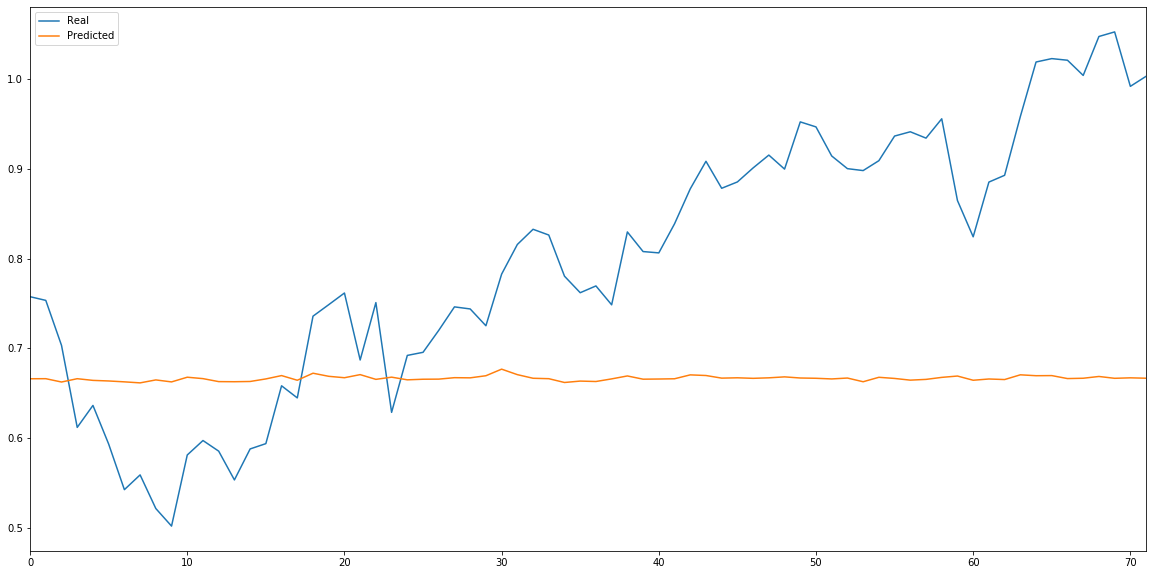

In [123]:
stocks.plot(figsize = (20,10))